<center><h1>Data Analysis<h1><center>

---

In [1]:
from Metrics import getSentiment, getQuoteBased, getSensationalized, getMudslinging
import json
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Toby
[nltk_data]     Britton\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
print("Loading File")
file = open("rust-articles-backup.json", encoding="utf8")
articles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

Loading File
File Loaded


In [3]:
# print(articles['publisher'].value_counts())
# print(articles['categories'].value_counts())
print(articles.columns)
# print(articles['body'][articles['categories'].str.contains('leonardo dicaprio')].reset_index(drop=True)[1])
# print(articles['body'][articles['categories'].str.contains('opinion')].reset_index(drop=True)[1])

Index(['url', 'publisher', 'headline', 'twitterHeadline', 'description',
       'categories', 'body', 'images', 'thumbnail', 'videos', 'datePublished',
       'dateUpdated', 'dateParsed'],
      dtype='object')


Get Sentiment Test

In [4]:
"""sentiment = []
for i in range(len(articles)):
    score = getSentiment(articles.at[i,'body'])
    sentiment.append(score)
    articles.at[i,'sentiment'] = score
articles.to_json('rust-articles-backup-metrics.json')"""

print("Loading File")
file = open("rust-articles-backup-metrics.json", encoding="utf8")
metricArticles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")
sentiment = []
for i in range(len(metricArticles)):
    sentiment.append(metricArticles.iloc[i]['sentiment'])

Loading File
File Loaded


Get Quotebased Test

In [5]:
count = 0
total = 0
opp = []
o = articles[articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(o)):
    quoteBased,_,_ = getQuoteBased(o.at[i,'body'])
    # print(ob.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += quoteBased
    opp.append(quoteBased)
print('Opinion:',count, round(total/count,5))

count = 0
total = 0
fac = []
f = articles[~articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(f)):
    quoteBased,_,_ = getQuoteBased(f.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += quoteBased
    fac.append(quoteBased)
print('Fact:',count, round(total/count,5))

count = 0
total = 0
all = []
quotes = []
for i in range(len(articles)):
    quoteBased,quote,_ = getQuoteBased(articles.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += quoteBased
    all.append(quoteBased)
    quotes.append(quote)
print('All:',count, round(total/count,5))
print(Counter(quotes))

Opinion: 1840 0.13374
Fact: 159385 0.17788
All: 161225 0.17737
Counter({0: 70299, 2: 8892, 4: 6483, 6: 5562, 8: 5320, 10: 5135, 12: 4506, 14: 4033, 16: 3496, 18: 3027, 11: 2572, 13: 2561, 9: 2559, 20: 2477, 7: 2331, 22: 2258, 15: 2230, 17: 1981, 5: 1956, 24: 1844, 19: 1761, 21: 1460, 26: 1456, 3: 1313, 23: 1257, 28: 1202, 30: 1070, 25: 1029, 27: 911, 32: 906, 34: 713, 29: 710, 1: 673, 31: 595, 36: 571, 38: 495, 33: 469, 40: 414, 35: 405, 42: 350, 37: 342, 39: 301, 44: 269, 46: 235, 41: 229, 43: 202, 48: 185, 50: 162, 45: 153, 47: 135, 52: 131, 54: 130, 49: 108, 56: 96, 51: 81, 58: 81, 62: 77, 55: 71, 53: 65, 68: 50, 57: 49, 60: 46, 61: 45, 59: 45, 70: 43, 64: 41, 66: 37, 67: 30, 63: 29, 65: 29, 69: 27, 74: 22, 72: 21, 76: 21, 71: 19, 78: 18, 80: 18, 75: 14, 82: 13, 90: 13, 102: 11, 84: 11, 79: 11, 88: 10, 77: 9, 73: 9, 85: 8, 81: 8, 98: 8, 89: 7, 92: 7, 86: 7, 94: 6, 104: 6, 100: 6, 111: 5, 96: 5, 112: 5, 83: 5, 91: 5, 95: 4, 118: 4, 101: 4, 126: 4, 106: 3, 120: 3, 109: 3, 105: 3, 138:

Get Sensationalized Test

In [6]:
sensationalized = []
for i in range(len(articles)):
    score = getSensationalized(articles.at[i,'body'])
    sensationalized.append(score)

Get Mudslinging Test

In [ ]:
mudslinging = []
for i in range(len(articles)):
    score = getMudslinging(articles.at[i,'body'])
    mudslinging.append(score)

{0.0: 125663, 0.1: 31227, 0.2: 3458, 0.3: 659, 0.8: 3, 1: 2, 0.7: 6, 0.4: 142, 0.5: 48, 0.6: 16, 0.9: 1}


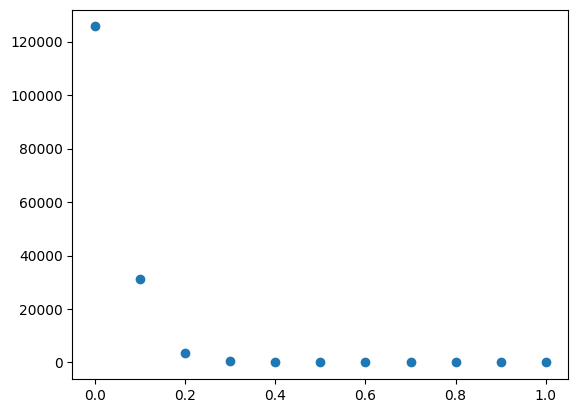

In [7]:
grouped = {}
for score in sensationalized:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

{0.5: 10644, 0.2: 16062, 1: 219, 0.4: 15993, 0.3: 18021, 0.1: 14181, 0.0: 76160, 0.7: 2658, 0.6: 5787, 0.8: 1079, 0.9: 421}


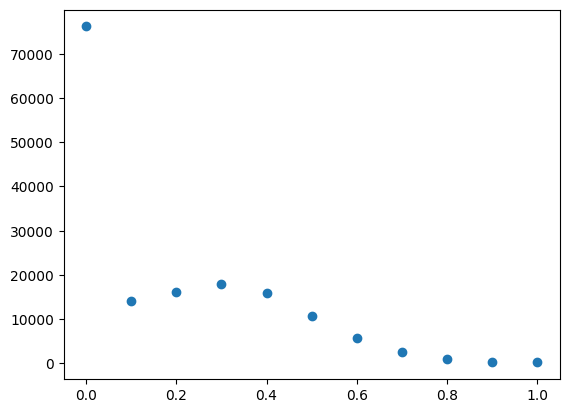

In [8]:
grouped = {}
for score in all:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

{0.3: 2955, 0.5: 2296, 1.0: 61790, 0.0: 55453, 0.1: 10591, 0.6: 2340, 0.2: 4348, 0.9: 11379, 0.4: 2439, 0.7: 3068, 0.8: 4566}


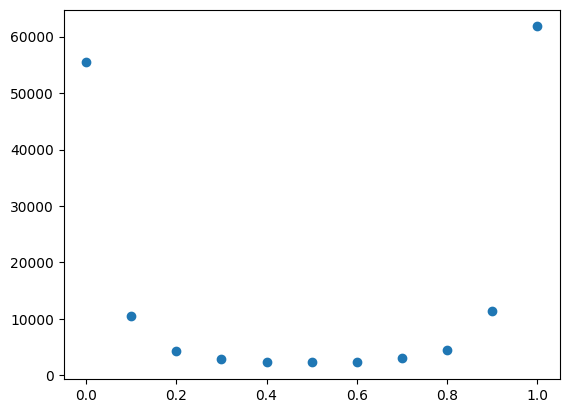

In [9]:
grouped = {}
for score in sentiment:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

Regression Testing

In [10]:
from sklearn.linear_model import LinearRegression

training_x = pd.DataFrame([1,10,1,10])
training_y = pd.DataFrame([1,0,1,0])
testing_x = pd.DataFrame([2])

model = LinearRegression().fit(training_x.to_numpy(), training_y.to_numpy().ravel())
result = pd.DataFrame(model.predict(testing_x.to_numpy()))
result

,0
0,0.888889
